In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import scipy.signal as signal


# FIR Filter : Sine-Wave Analysis

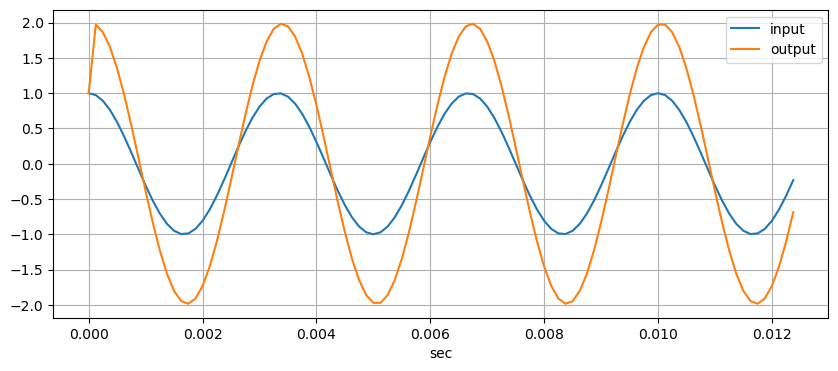

In [2]:
fs = 8000       # sampling rate (F)
dur = 1         # duration, 1 second
f0 = 300       # frequency to generate, you can change the frequency 


# input
x = np.cos(2*np.pi*f0*np.arange(dur*fs)/fs)

# delayed output
h1 = [1, 1]
y1 = np.convolve(x,h1)


plt.figure(figsize=(10, 4))

L = 100
n= np.arange(L)
plt.plot(n/fs, x[:L])
plt.plot(n/fs, y1[:L])
plt.grid(True)
plt.xlabel('sec')

plt.legend(['input','output'])


# FIR Filter: Frequency Response

Text(0.5, 0, 'Frequency [rad/sample]')

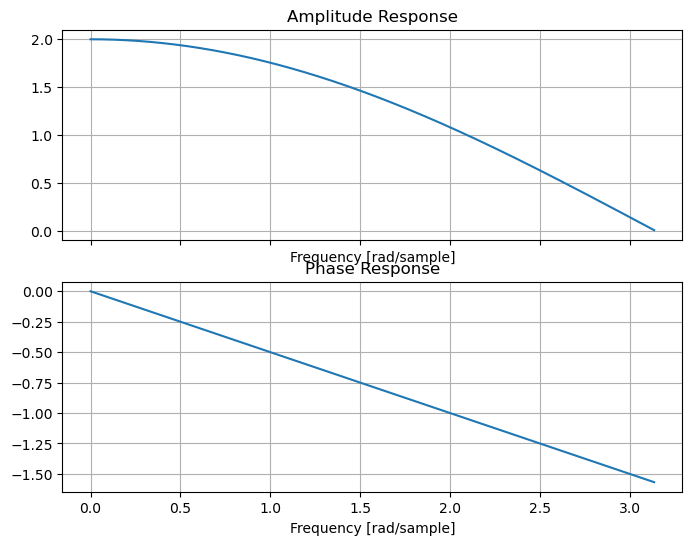

In [3]:
w, h = signal.freqz(h1)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8,6))

ax[0].plot(w, np.abs(h))
ax[0].grid(True)
ax[0].set_title('Amplitude Response')
ax[0].set_xlabel('Frequency [rad/sample]')

ax[1].plot(w, np.angle(h))
ax[1].grid(True)
ax[1].set_title('Phase Response')
ax[1].set_xlabel('Frequency [rad/sample]')



# FIR Filters: Sound Examples

In [5]:
x, sr = librosa.load("../audio/Snare.wav") 
#y, sr = librosa.load("../audio/white_noise.wav") 
print(sr)
ipd.Audio(x, rate=sr)


22050


### Simplest lowpass filter

In [6]:
h1 = [1, 1];
y1 = np.convolve(x,h1)

ipd.Audio(y1, rate=sr)

### Simplest highpass filter

In [7]:
h2 = [1, -1];
y2 = np.convolve(x,h2)

ipd.Audio(y2, rate=sr)

### Moving average filter

In [8]:
h3 = [1/5, 1/5, 1/5, 1/5, 1/5];
y3 = np.convolve(x,h3)

ipd.Audio(y3, rate=sr)

### Convolution Reverb

In [9]:
h5, sr = librosa.load("../audio/memchu_ir.wav") 
print(sr)

y5 = np.convolve(x,h5)

ipd.Audio(y5, rate=sr)


22050


# IIR FIlter: Sine-Wave Analysis

220


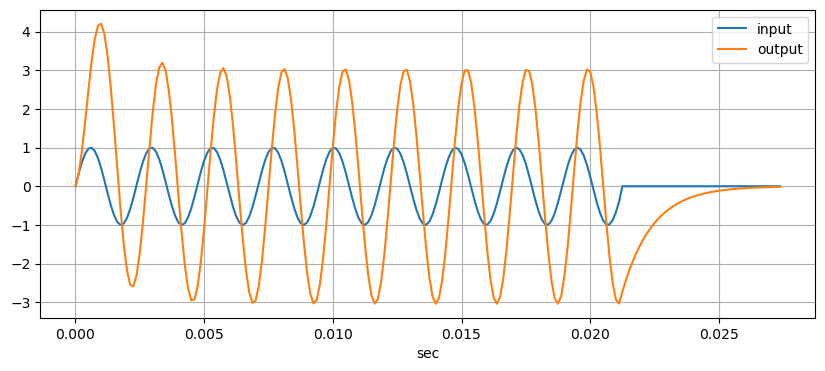

In [10]:
fs = 8000       # sampling rate (F)
dur = 1         # duration, 1 second
f0 = 423        # frequency to generate, you can change the frequency 


# input
x = np.sin(2*np.pi*f0*np.arange(dur*fs)/fs)

x_segment = x[:170]
x_segment = np.append(x_segment, np.zeros(50))

# delayed output
b1 = [1]
a1 = [1, -0.9]
y1 = signal.lfilter(b1,a1,x_segment)

print(len(y1))

plt.figure(figsize=(10, 4))

L = len(x_segment)
n= np.arange(L)
plt.plot(n/fs, x_segment[:L])
plt.plot(n/fs, y1[:L])
plt.grid(True)
plt.xlabel('sec')

plt.legend(['input','output'])


# Frequency Response: One-pole Lowpass Filter

Text(0.5, 0, 'Frequency [rad/sample]')

<Figure size 1000x500 with 0 Axes>

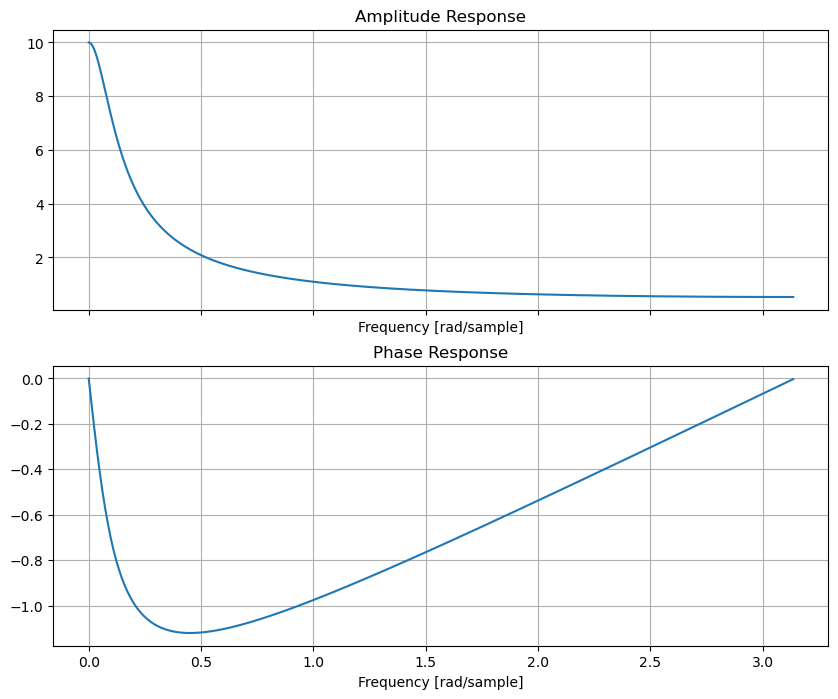

In [11]:
b1 = [1]
a1 = [1, -0.9]

w, h = signal.freqz(b1,a1)

plt.figure(figsize=(10, 5))

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(10,8))

ax[0].plot(w, np.abs(h))
ax[0].grid(True)
ax[0].set_title('Amplitude Response')
ax[0].set_xlabel('Frequency [rad/sample]')

ax[1].plot(w, np.angle(h))
ax[1].grid(True)
ax[1].set_title('Phase Response')
ax[1].set_xlabel('Frequency [rad/sample]')


# Frequency Response: Resonant Lowpass Filter


Text(0.5, 0, 'Frequency [rad/sample]')

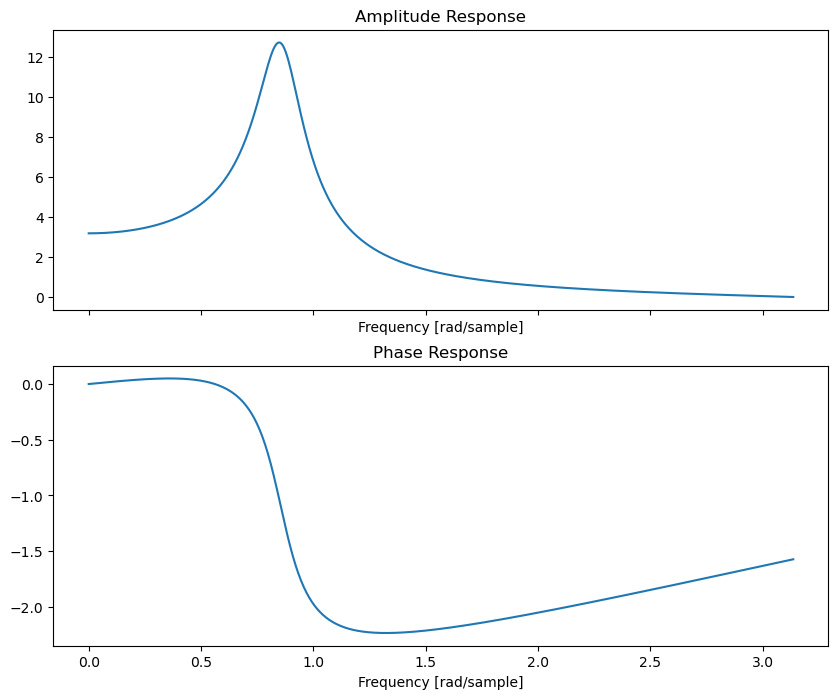

In [12]:
b1 = [1, 1]
r = 0.9
fc = 6000
sr = 44100
theta = 2*np.pi*fc/sr
a1 = [1, -2*r*np.cos(theta), r*r]

w, h = signal.freqz(b1,a1)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(10,8))

ax[0].plot(w, np.abs(h))
#ax[0].grid(True)
ax[0].set_title('Amplitude Response')
ax[0].set_xlabel('Frequency [rad/sample]')

ax[1].plot(w, np.angle(h))
#ax[1].grid(True)
ax[1].set_title('Phase Response')
ax[1].set_xlabel('Frequency [rad/sample]')


# Impulse Response: Resonant Lowpass Filter

Text(0.5, 0, 'sec')

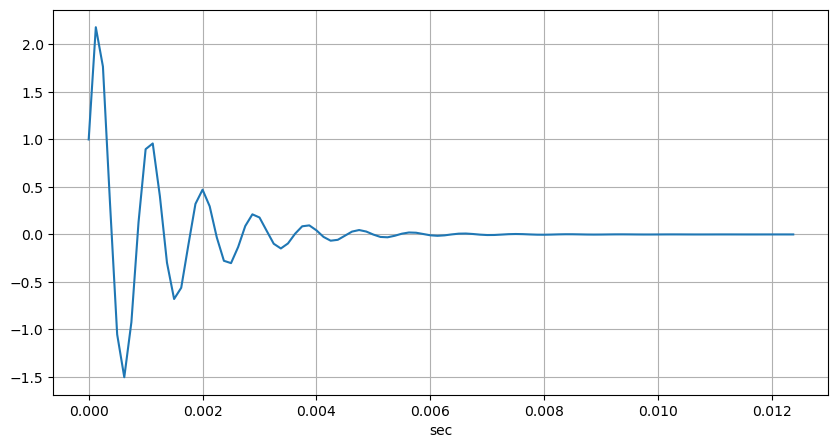

In [13]:
b1 = [1, 1]
r = 0.9
fc = 6000
sr = 44100
theta = 2*np.pi*fc/sr
a1 = [1, -2*r*np.cos(theta), r*r]


x= np.zeros(100)
x[0]= 1
y = signal.lfilter(b1,a1,x)

plt.figure(figsize=(10, 5))

L = len(y)
n= np.arange(L)
plt.plot(n/fs, y)
plt.grid(True)
plt.xlabel('sec')



# Leaky Integrator

In [16]:
x, sr = librosa.load("../audio/Snare.wav") 
#x, sr = librosa.load("../audio/white_noise.wav") 


b1 = [1]
a1 = [1, -0.9]

#a1 = [1]
#a1 = np.append(a1, np.zeros(8))
#a1 = np.append(a1, -0.9)

print(a1)

y1 = signal.lfilter(b1,a1,x)

print(sr)

ipd.Audio(y1, rate=sr)

[1, -0.9]
22050


 ## Resonant Lowpass Filter

In [22]:
x, sr = librosa.load("../audio/Snare.wav") 
#x, sr = librosa.load("../audio/white_noise.wav") 


r = 0.99
fc = 2000
theta = 2*r*np.cos(fc/sr)

b2 = [1, 1]
a2 = [1, -2*r*np.cos(fc/sr), r*r]

y2 = signal.lfilter(b2,a2,x)

ipd.Audio(y2, rate=sr)